In [1]:
from numpy import *
from numpy.random import dirichlet as d
import matplotlib.pyplot as plt
plt.style.use("/Users/mike/mfpy/plt_style")

def r(l): return list(map(lambda x: round(x, 5), l))

In [21]:
def sample_for_input(inp):
    samp = d(inp)
    print("One sample from input {} returns {}".format(r(inp), r(samp)))

sample_for_input([1, 1])
sample_for_input([1, 1, 1])
print("-"*20)
sample_for_input([1/6, 2/6, 3/6])
sample_for_input([1, 2, 3])
sample_for_input([100, 200, 300])

One sample from input [1, 1] returns [0.47078, 0.52922]
One sample from input [1, 1, 1] returns [0.30185, 0.51103, 0.18712]
--------------------
One sample from input [0.16667, 0.33333, 0.5] returns [0.23239, 0.40483, 0.36279]
One sample from input [1, 2, 3] returns [0.30888, 0.09373, 0.59739]
One sample from input [100, 200, 300] returns [0.1745, 0.33283, 0.49267]


In [22]:
def summarise(s):
    a = [i[0] for i in s]
    b = [i[1] for i in s]
    c = [i[2] for i in s]
    return list(map(mean, [a, b, c])), list(map(var, [a, b, c]))

def many_samples_for_input(inp, n):
    s = d(inp, n)
    s_bar, s_hat = summarise(s)
    print("{} samples from input {} returns \nmean: {} \nvariance: {}\n\n".format(n, r(inp), r(s_bar), r(s_hat)))

N = 100000    
many_samples_for_input([1/6, 2/6, 3/6], N)
many_samples_for_input([1, 2, 3], N)
many_samples_for_input([100, 200, 300], N)


100000 samples from input [0.16667, 0.33333, 0.5] returns 
mean: [0.16729, 0.32879, 0.50392] 
variance: [0.0699, 0.1104, 0.12508]


100000 samples from input [1, 2, 3] returns 
mean: [0.16629, 0.33279, 0.50092] 
variance: [0.01982, 0.03179, 0.03581]


100000 samples from input [100, 200, 300] returns 
mean: [0.16658, 0.33335, 0.50008] 
variance: [0.00023, 0.00037, 0.00042]




## Thinking in Urns!

Start with <span style="color:blue">α<sub>b</sub> blue balls</span>, <span style="color:red"> α<sub>r</sub> red balls</span> and <span style="color:green">α<sub>g</sub> green balls</span> in an urn.  
Pick a ball at random from the urn and then put it back with another ball of the same colour.
Keep doing this forever.

E.g. we start with <span style="color:blue">1 blue ball</span>, <span style="color:red">2 red balls</span>, and <span style="color:green">3 green balls</span>.  
We pick out a ball a random. It's red so we put it back in our urn and add another red ball.  
Now we have <span style="color:blue">1 blue ball</span>, <span style="color:red">3 red balls</span>, and <span style="color:green">3 green balls</span>.   
We pick out a second ball a random. It's green so we put it back in our urn and add another green ball.  
Now we have <span style="color:blue">1 blue ball</span>, <span style="color:red">3 red balls</span>, and <span style="color:green">4 green balls</span>  

If we continue this process indefinetely, the proportion of the colours in our urn will be a sample from __dirichlet(<span style="color:blue">α<sub>b</sub>=1</span>, <span style="color:red">α<sub>r</sub>=2</span>, <span style="color:green">α<sub>g</sub>=3</span>)__ (our start state).


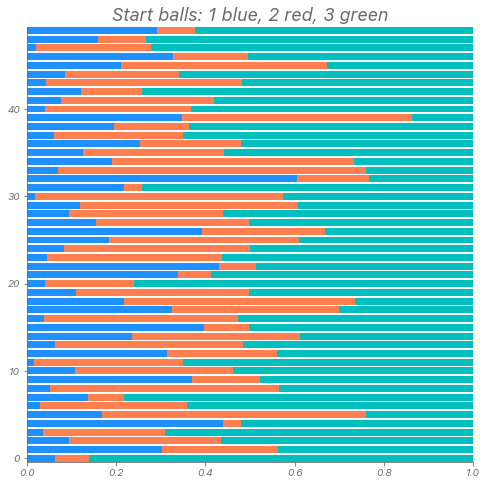

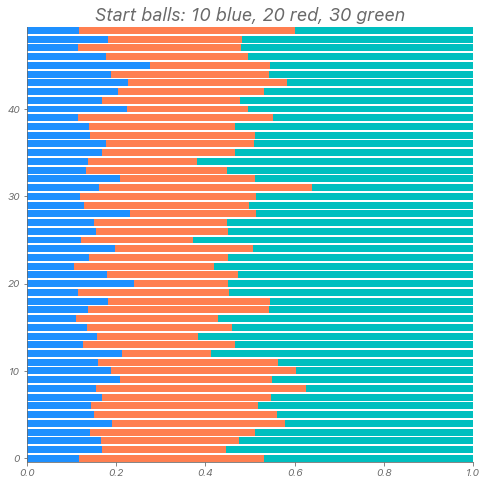

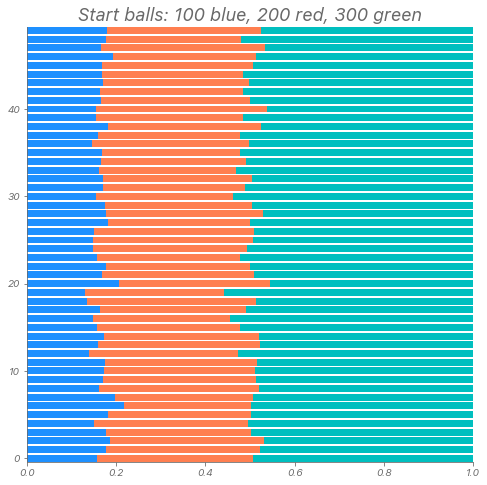

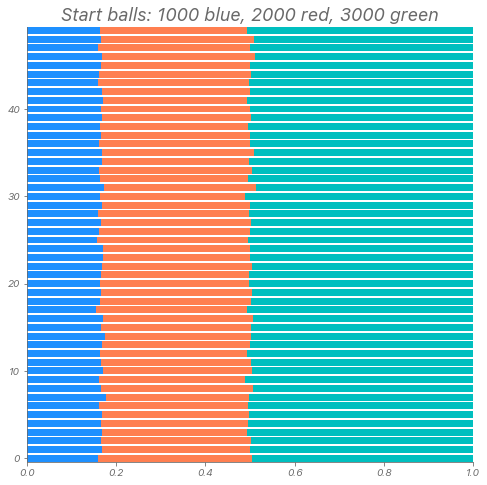

In [17]:
plt.rcParams["figure.figsize"] = (8,8)

def plot_urns(inp):
    n_strings = 50
    s = d(inp, n_strings).transpose()
    plt.barh(range(n_strings), s[0])
    plt.barh(range(n_strings), s[1], left=s[0])
    plt.barh(range(n_strings), s[2], left=s[0]+s[1])
    plt.title("Start balls: α{} blue, α{} red, α{} green".format(*inp))

plot_urns([1, 2, 3])
plt.show()
plot_urns([10, 20, 30])
plt.show()
plot_urns([100, 200, 300])
plt.show()
plot_urns([1000, 2000, 3000])
plt.show()


In [56]:
b = random.beta(50,950, size=1000000)
print('mean:', mean(b))
print('variance:', var(b))

mean: 0.05000875993747011
variance: 4.7437586141978114e-05


In [57]:
b = random.beta(100,900, size=100000000)
print('mean:', mean(b))
print('variance:', var(b))

mean: 0.10000825354620538
variance: 8.987632781634619e-05


In [62]:
ds = [i[0] for i in d([50,100,850], size=1000000)]
print('mean:', mean(ds))
print('variance:', var(ds))

mean: 0.0500090944437287
variance: 4.744260527700719e-05
